In [96]:
import os
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [27]:
#!/bin/bash
!curl -L -o ./dog-and-cat-classification-dataset.zip https://www.kaggle.com/api/v1/datasets/download/bhavikjikadara/dog-and-cat-classification-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  775M  100  775M    0     0   115M      0  0:00:06  0:00:06 --:--:--  112M


In [30]:
%%capture
!unzip /content/dog-and-cat-classification-dataset.zip

In [29]:
datadir = "/content/PetImages"
catagories = ["Dog","Cat"]

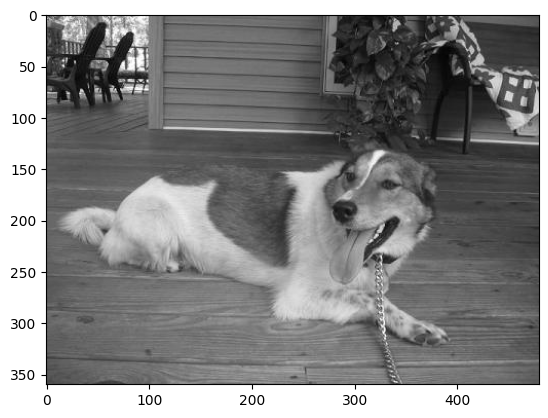

In [33]:
for i in catagories:
    path = os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break

In [35]:
print(img_array.shape)

(360, 480)


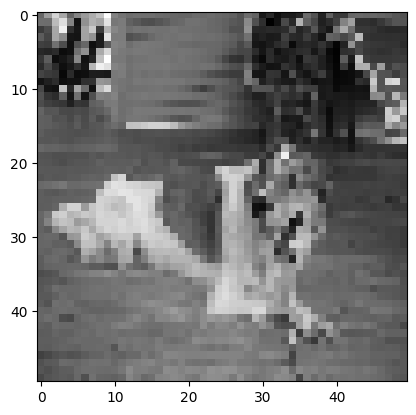

In [44]:
img_size = 50
new_img_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_img_array, cmap="gray")
plt.show()

In [112]:
training_set = []

def create_training_set():
    for i in catagories:
        path = os.path.join(datadir,i)
        class_num = catagories.index(i)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                if img_array is not None:
                    new_img_array = cv2.resize(img_array, (img_size,img_size))
                    training_set.append([new_img_array, class_num])
                else:
                    pass
            except Exception as e:
                pass

create_training_set()

In [47]:
print(len(training_set))

24946


In [113]:
import random
random.shuffle(training_set)

1


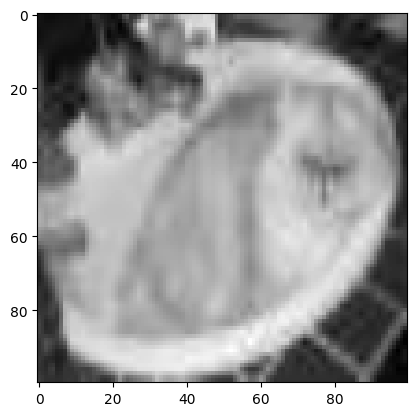

0


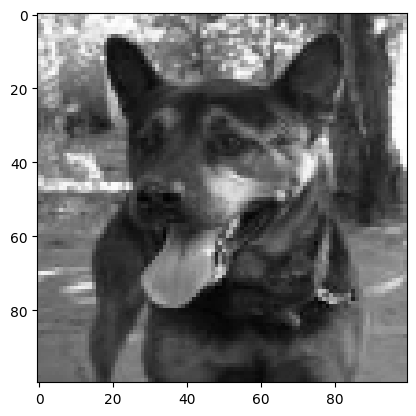

0


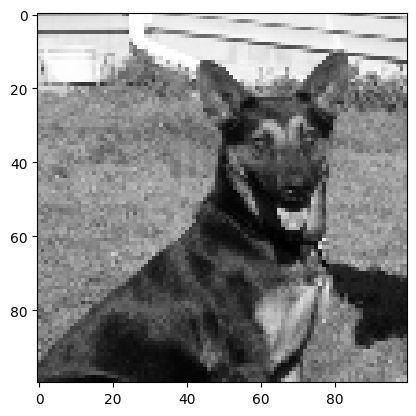

1


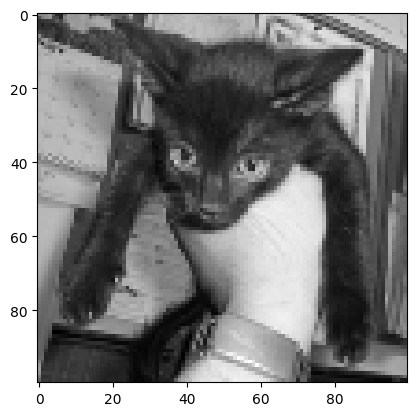

1


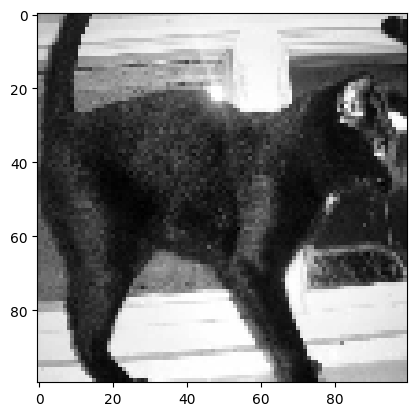

0


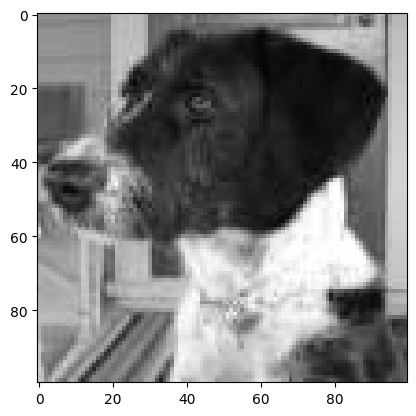

1


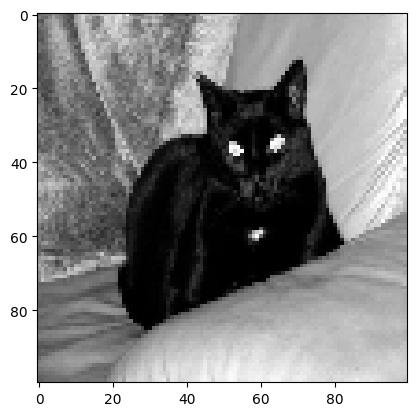

0


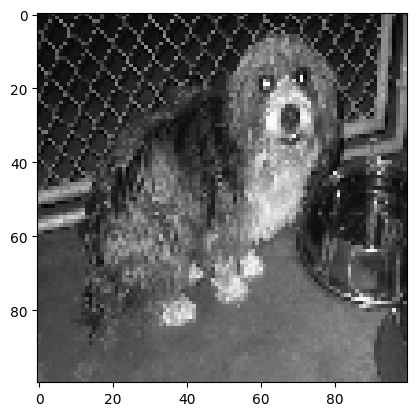

1


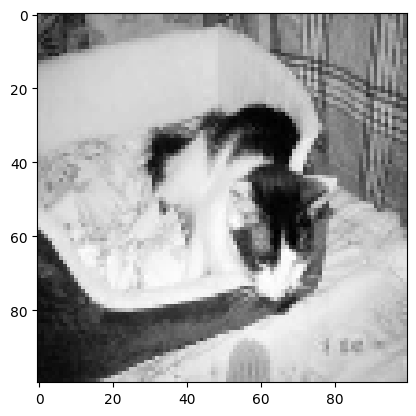

1


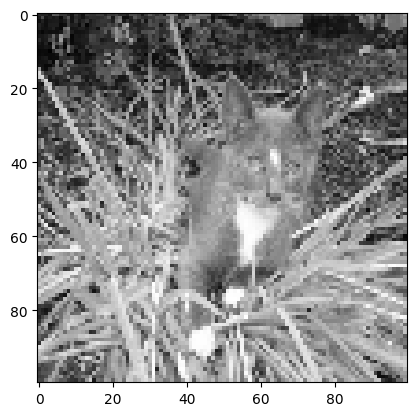

In [114]:
for sample in training_set[:10]:
    print(sample[1])
    plt.imshow(sample[0], cmap="gray")
    plt.show()

In [115]:
X=[]
y=[]

for features,labels in training_set:
    X.append(features)
    y.append(labels)
y = np.array(y)

In [116]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X/255
model = Sequential()
# Pass input_shape to the first Conv2D layer
# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Summary
model.summary()

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,121 (9.36 MB)

 Trainable params: 2,452,673 (9.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 95ms/step - accuracy: 0.5422 - loss: 1.3351 - val_accuracy: 0.6369 - val_loss: 0.6370
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.5993 - loss: 0.6528 - val_accuracy: 0.6685 - val_loss: 0.5979
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 91ms/step - accuracy: 0.6422 - loss: 0.6134 - val_accuracy: 0.5841 - val_loss: 0.6601
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - accuracy: 0.6751 - loss: 0.5761 - val_accuracy: 0.6745 - val_loss: 0.5772
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 90ms/step - accuracy: 0.6949 - loss: 0.5486 - val_accuracy: 0.7282 - val_loss: 0.5127
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.6988 - loss: 0.5284 - val_accuracy: 0.7618 - val_loss: 0.5105
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.7170 - loss: 0.5171 - val_accuracy: 0.7058 - val_loss: 0.5452
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - accuracy: 0.7250 - loss: 0.5074 - 

In [117]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path, model, target_size=(img_size, img_size)):
    # Load image and resize, loading as grayscale
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)  # Convert to array
    img_array = img_array / 255.0        # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)[0][0]  # Get scalar output

    # Show image
    # Display the grayscale image array
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.axis('off')
    label = "Dog" if prediction >= 0.5 else "Cat"
    confidence = prediction if prediction >= 0.5 else 1 - prediction
    plt.title(f"Prediction: {label} ({confidence:.2f})")
    plt.show()

    return label, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


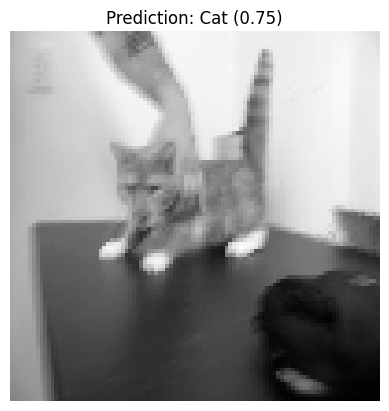

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


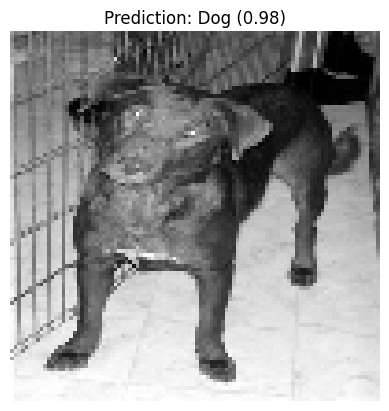

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


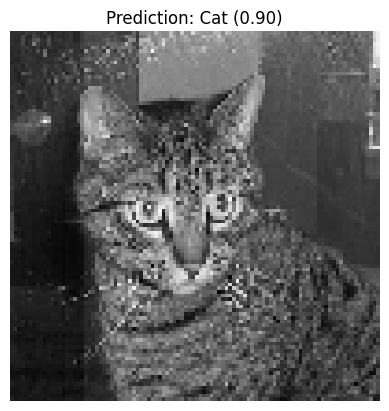

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


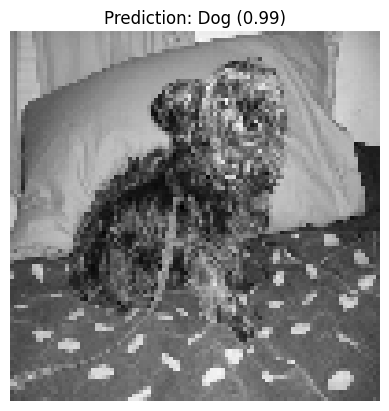

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


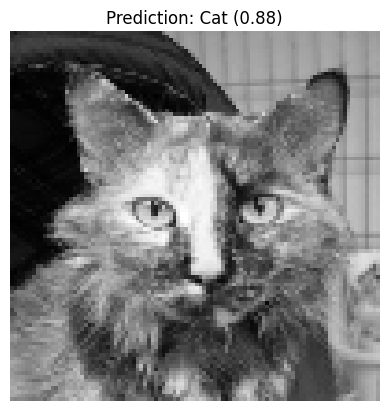

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


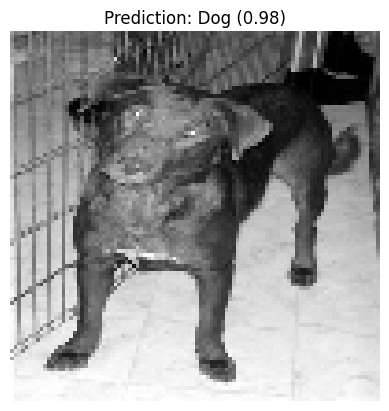

('Dog', np.float32(0.9799509))

In [121]:
# Example usage
predict_image("/content/PetImages/Cat/0.jpg", model)
predict_image("/content/PetImages/Dog/1.jpg", model)
predict_image("/content/PetImages/Cat/1.jpg", model)
predict_image("/content/PetImages/Dog/0.jpg", model)
predict_image("/content/PetImages/Cat/10.jpg", model)
predict_image("/content/PetImages/Dog/1.jpg", model)